<a href="https://colab.research.google.com/github/akashsharma-2002/CAT-VS-DOG-CNN-MODEL/blob/main/CAT_VS_DOG_CNN_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files



## THIS WAY WE CAN DIRECTLY GET THE DATASET FROM KAGGLE WITHOUT DOWNLOADING
###MAKING A DIRECTORY WHERE KAGGLE.JSON FILE IS USED

THIS KAGGLE.JSON FILE IS DOWNLOADED FROM KAGGLE WHERE EACH ACCOUNT IS PROVIDED WITH SPECIFIC API TOKEN.

In [9]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

COPYING THE DATASET PATH AND DIRECTLY DOWNLOADING THE DATASET INTO THE FOLDER

In [10]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


UNZIPPING THE FILES

In [11]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

IMPORTING ALL THE NECESSARY LIBRARY

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

MAKING A TRAINING AND TESTING FILE FOR VALIDATION AND TRAINING THE DATASET

In [7]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


### normalizing the data from 0-256 to 0-1.

In [12]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

Creating model and adding hidden layer

In [13]:

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

## USING OPTIMIZER AND LOSS FUNCTION

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

## Training the mode

In [16]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 81s 105ms/step - loss: 1.3133 - accuracy: 0.5905 - val_loss: 0.6548 - val_accuracy: 0.6560
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5643 - accuracy: 0.7115 - val_loss: 0.5186 - val_accuracy: 0.7396
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4803 - accuracy: 0.7717 - val_loss: 0.4756 - val_accuracy: 0.7812
Epoch 4/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4153 - accuracy: 0.8134 - val_loss: 0.4181 - val_accuracy: 0.8030
Epoch 5/10
625/625 [==============================] - 68s 109ms/step - loss: 0.3629 - accuracy: 0.8409 - val_loss: 0.4961 - val_accuracy: 0.7750
Epoch 6/10
625/625 [==============================] - 66s 106ms/step - loss: 0.2997 - accuracy: 0.8711 - val_loss: 0.4354 - val_accuracy: 0.8142
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2341 - accuracy: 0.9049 - val_loss: 0.8732 - val_ac

## MODEL PREDICTION
### 0- DOG
### 1- CAT

In [18]:
import cv2

In [21]:
import matplotlib.pyplot as plt

In [39]:
check=cv2.imread('/content/test/dogs/dog.100.jpg')

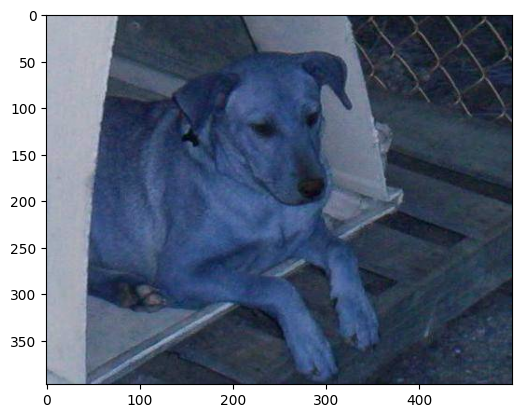

In [40]:
plt.imshow(check)

In [42]:
check.size

595500

In [43]:
check.shape

(397, 500, 3)

In [47]:
check1= cv2.resize(check,(256,256))

In [48]:
check2 = check1.reshape((1,256,256,3))

O indicates prediction is DOG

In [49]:
model.predict(check2)

1/1 [==============================] - 0s 19ms/step


array([[0.]], dtype=float32)

In [67]:
cat_check=cv2.imread('/content/test/cats/cat.10000.jpg')

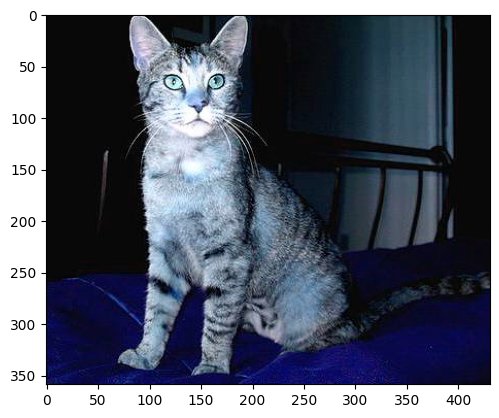

In [68]:
plt.imshow(cat_check)

In [69]:
cat_check.shape

(359, 431, 3)

In [70]:
cat_shape1=cv2.resize(cat_check,(256,256))

In [71]:
cat_shape2=cat_shape1.reshape(1,256,256,3)

### 1 INDICATES PREDICTION OF CAT HERE

In [72]:
model.predict(cat_shape2)

1/1 [==============================] - 0s 21ms/step


array([[1.]], dtype=float32)

## CHECKING THE ACCURACY AND PRECISION OF THE MODEL.

In [75]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score

# Make predictions on the validation set
y_true = []
y_pred = []
for images, labels in validation_ds:
    predictions = model.predict(images)
    y_true.extend(labels)
    y_pred.extend(np.round(predictions).astype(int).flatten())

# Calculate accuracy and precision
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)

# Print the results
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))


1/1 [==============================] - 0s 108ms/step
Accuracy: 79.72%
Precision: 82.25%
